In [38]:
%pip install opencv-python tensorflow pillow scikit-learn matplotlib 'tensorflow[and-cuda]' face_recognition 'numpy<2.0.0' mediapipe

Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import metrics
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K
import face_recognition
import mediapipe as mp


In [40]:
# Verifica as GPUs disponíveis
gpus = tf.config.experimental.list_physical_devices('GPU')

# Verifica a configuração atual das GPUs
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))

os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [41]:
# Caminhos e parâmetros
data_dir = './faces'  # Pasta com os dados de treino
output_dir = './faces_detectadas'
img_width, img_height = 150, 150
padding = 0
batch_size = 20

# Cria o diretório de saída se não existir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Inicializa o contador de imagens
img_counter = 0


In [42]:
# Inicializa o detector de faces do MediaPipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Varre cada subpasta dentro do diretório de dados
for person_name in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_name)
    print(f'Processando imagens de: {person_path}')

    # Verifica se é um diretório (representando uma classe)
    if os.path.isdir(person_path):
        # Cria uma subpasta para a classe no diretório de saída
        class_output_dir = os.path.join(output_dir, person_name)
        os.makedirs(class_output_dir, exist_ok=True)

        # Itera sobre cada imagem na subpasta da classe
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            imagem = cv2.imread(img_path)

            if imagem is not None:
                # Converte a imagem para RGB (MediaPipe requer RGB)
                imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

                # Detecta rostos na imagem usando MediaPipe
                with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
                    results = face_detection.process(imagem_rgb)

                if results.detections:
                    for detection in results.detections:
                        # Obtém as coordenadas da caixa delimitadora
                        bboxC = detection.location_data.relative_bounding_box
                        h, w, _ = imagem.shape
                        x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
                        x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

                        # Adiciona padding e verifica limites
                        top = max(0, y1 - padding)
                        bottom = min(h, y2 + padding)
                        left = max(0, x1 - padding)
                        right = min(w, x2 + padding)

                        # Recorta a face detectada
                        face_img = imagem[top:bottom, left:right]
                        try:
                            # Redimensiona a face
                            resized_face = cv2.resize(face_img, (img_width, img_height))

                            # Define o nome do arquivo de saída
                            output_filename = f'img{img_counter}.jpg'
                            output_path = os.path.join(class_output_dir, output_filename)

                            # Salva a face detectada
                            cv2.imwrite(output_path, resized_face)
                            print(f'Face detectada salva em: {output_path}')
                        except Exception as e:
                            print(f'Erro ao redimensionar imagem {img_path}: {e}')
                            continue

                        # Incrementa o contador de imagens
                        img_counter += 1
                else:
                    print(f'Nenhuma face detectada em: {img_path}')
            else:
                print(f'Erro ao carregar imagem: {img_path}')

Processando imagens de: ./faces/Araujo
Face detectada salva em: ./faces_detectadas/Araujo/img0.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img1.jpg


I0000 00:00:1731818366.160877  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.162359  402327 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.181962  402320 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.252729  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.253513  402353 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.274705  402345 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.349843  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Araujo/img2.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img3.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img4.jpg


I0000 00:00:1731818366.437120  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.438305  402400 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.455636  402393 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.513263  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.514883  402414 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.529884  402406 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.587069  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Araujo/img5.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img6.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img7.jpg


I0000 00:00:1731818366.660793  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.662392  402461 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.679624  402455 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.750054  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.751143  402474 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.773106  402466 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Araujo/img8.jpg
Processando imagens de: ./faces/Giovanelli
Face detectada salva em: ./faces_detectadas/Giovanelli/img9.jpg


I0000 00:00:1731818366.884389  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.885711  402499 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.905484  402492 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.934794  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818366.936023  402521 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818366.954605  402514 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818366.981050  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Giovanelli/img10.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img11.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img12.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img13.jpg
Processando imagens de: ./faces/Bodruch


I0000 00:00:1731818367.110687  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818367.112671  402580 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818367.128437  402573 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818367.321607  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818367.322436  402621 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818367.340139  402615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818367.468927  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Bodruch/img14.jpg
Face detectada salva em: ./faces_detectadas/Bodruch/img15.jpg


I0000 00:00:1731818367.589360  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818367.590571  402673 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818367.607682  402666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818367.772470  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818367.773390  402702 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818367.797454  402695 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Bodruch/img16.jpg
Face detectada salva em: ./faces_detectadas/Bodruch/img17.jpg


I0000 00:00:1731818367.973841  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818367.974763  402742 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818367.990810  402735 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.082710  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.083599  402778 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.098273  402771 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Bodruch/img18.jpg
Face detectada salva em: ./faces_detectadas/Bodruch/img19.jpg


I0000 00:00:1731818368.199080  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.200235  402804 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.217357  402797 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.345392  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.346856  402836 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.372470  402828 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Bodruch/img20.jpg
Face detectada salva em: ./faces_detectadas/Bodruch/img21.jpg


I0000 00:00:1731818368.600837  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.602116  402863 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.626875  402855 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.657377  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.658503  402886 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.679591  402879 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.703594  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Bodruch/img22.jpg
Processando imagens de: ./faces/Vinicin
Face detectada salva em: ./faces_detectadas/Vinicin/img23.jpg
Face detectada salva em: ./faces_detectadas/Vinicin/img24.jpg
Face detectada salva em: ./faces_detectadas/Vinicin/img25.jpg


W0000 00:00:1731818368.852010  402914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.880195  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.881596  402944 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.898392  402938 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818368.965175  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818368.966500  402968 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818368.982184  402961 inference_feedback_manager.cc:114] Feedback 

Face detectada salva em: ./faces_detectadas/Vinicin/img26.jpg
Face detectada salva em: ./faces_detectadas/Vinicin/img27.jpg
Processando imagens de: ./faces/Nery
Face detectada salva em: ./faces_detectadas/Nery/img28.jpg
Face detectada salva em: ./faces_detectadas/Nery/img29.jpg


I0000 00:00:1731818369.122966  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.124216  403006 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818369.140259  402999 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.234186  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.235439  403032 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818369.250697  403025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.315592  384571 gl_context_egl.cc:85] Successfully initializ

Face detectada salva em: ./faces_detectadas/Nery/img30.jpg
Face detectada salva em: ./faces_detectadas/Nery/img31.jpg
Face detectada salva em: ./faces_detectadas/Nery/img32.jpg
Processando imagens de: ./faces/Thiago


W0000 00:00:1731818369.331504  403050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.420289  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.421467  403082 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818369.436441  403075 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.518165  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.518916  403108 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)


Face detectada salva em: ./faces_detectadas/Thiago/img33.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img34.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img35.jpg


W0000 00:00:1731818369.535212  403099 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.611348  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.612206  403123 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818369.626720  403116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818369.816357  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818369.817334  403162 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818369.838394  403155 inference_feedback_manager.cc:114] Feedback 

Face detectada salva em: ./faces_detectadas/Thiago/img36.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img37.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img38.jpg


I0000 00:00:1731818370.164990  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818370.166182  403228 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818370.184296  403221 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818370.383134  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818370.383931  403265 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818370.400461  403258 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Thiago/img39.jpg


I0000 00:00:1731818370.593220  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818370.594480  403294 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818370.610479  403286 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818370.805859  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5


Face detectada salva em: ./faces_detectadas/Thiago/img40.jpg


I0000 00:00:1731818370.807031  403320 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818370.822081  403312 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1731818371.004113  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818371.005066  403361 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818371.022731  403354 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Thiago/img41.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img42.jpg
Face detectada salva em: ./faces_detectadas/Thiago/img43.jpg


I0000 00:00:1731818371.177775  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818371.178974  403387 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818371.202341  403380 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Face detectada salva em: ./faces_detectadas/Thiago/img44.jpg


I0000 00:00:1731818371.414573  384571 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1731818371.416389  403427 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1731818371.434747  403420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [43]:
# Atualiza o diretório de dados para as faces detectadas
data_dir_faces = './faces_detectadas'

# Data augmentation e preparação do gerador de dados de treino para as faces detectadas
datagen_faces = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.5
)

train_generator_faces = datagen_faces.flow_from_directory(
    data_dir_faces,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_faces = datagen_faces.flow_from_directory(
    data_dir_faces,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Impressão de informações do gerador
print("Classes detectadas: ", train_generator_faces.class_indices)
print("Número de imagens de treinamento: ", train_generator_faces.samples)
print("Número de imagens de validação: ", validation_generator_faces.samples)

Found 25 images belonging to 6 classes.
Found 20 images belonging to 6 classes.
Classes detectadas:  {'Araujo': 0, 'Bodruch': 1, 'Giovanelli': 2, 'Nery': 3, 'Thiago': 4, 'Vinicin': 5}
Número de imagens de treinamento:  25
Número de imagens de validação:  20


Mostrando imagens do lote de treinamento


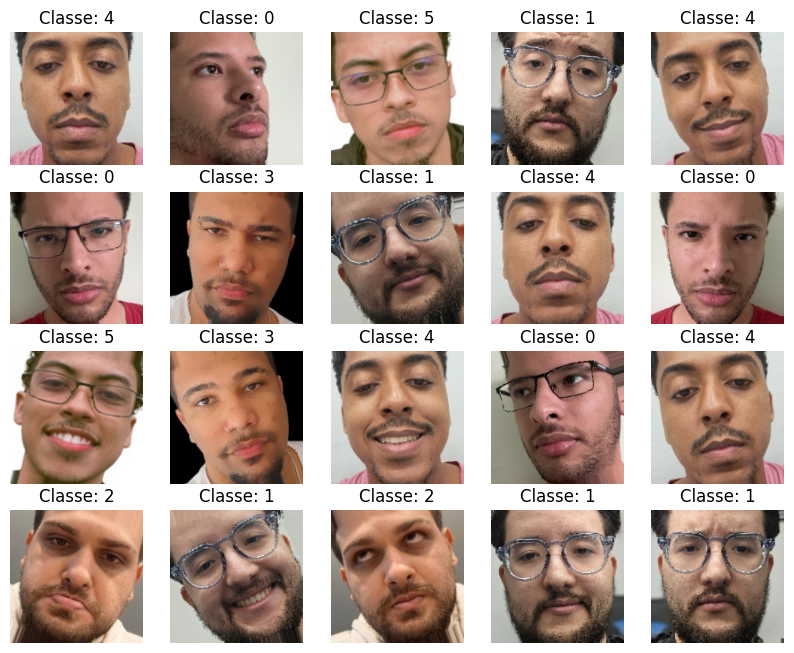

Mostrando imagens do lote de validação


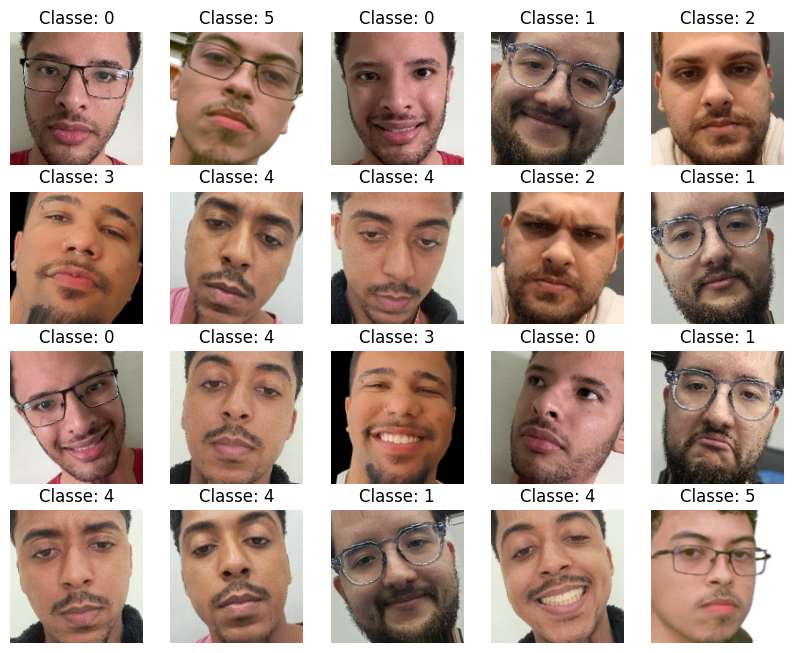

In [44]:
import matplotlib.pyplot as plt

# Carrega um lote de imagens do gerador de treinamento
images_train, labels_train = next(train_generator_faces)
images_validation, labels_validation = next(validation_generator_faces)

# Função para plotar as imagens e rótulos
def plot_images(images, labels, batch_size):
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(f"Classe: {labels[i].argmax()}")
        plt.axis('off')
    plt.show()

# Exibe as imagens de treino
print("Mostrando imagens do lote de treinamento")
plot_images(images_train, labels_train, batch_size)

# Exibe as imagens de validação
print("Mostrando imagens do lote de validação")
plot_images(images_validation, labels_validation, batch_size)


In [45]:
# Gerador de dados para aumento de dados
epochs = 2000
# Definição do Modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Primeira camada densa com Dropout
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Adiciona 18 camadas densas com Dropout
    Dense(256, activation='relu'),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='relu'),
    Dropout(0.2),
    
    # Camada de saída
    Dense(6, activation='softmax')
])

# model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Treinamento do Modelo (substitua `validation_generator_faces` pelo seu gerador de validação)
training_history = model.fit(train_generator_faces, epochs=epochs, validation_data=validation_generator_faces, verbose=1)


/home/vinicius/Documents/Aulas/ProcessamentoImagem/face_detection/face_detection/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/vinicius/Documents/Aulas/ProcessamentoImagem/face_detection/face_detection/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2000


2024-11-17 01:39:39.251424: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[5,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-17 01:39:39.352905: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[5,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_co

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0400 - loss: 1.7862 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00      

2024-11-17 01:39:51.503914: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[20,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-17 01:39:51.674516: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[20,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudn

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 8s/step - accuracy: 0.0533 - loss: 1.7841 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.7920 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.0800 - loss: 1.8280 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.7906 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - accuracy: 0.2533 - loss: 1.7596 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.7894 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.2600 - loss: 1.8001 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.7902 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.1733 - loss: 

KeyboardInterrupt: 

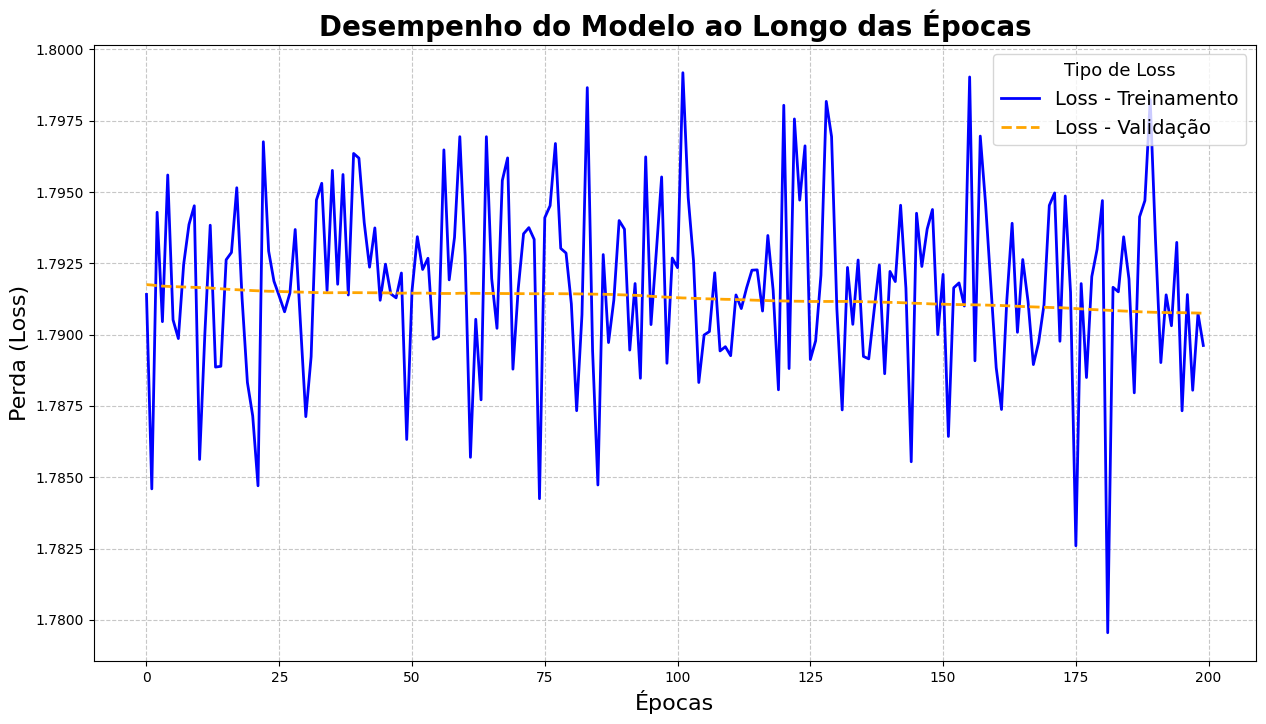

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(15, 8))

# Plota a perda do treino e da validação com diferentes estilos e cores
plt.plot(training_history.history['loss'], label='Loss - Treinamento', color='blue', linestyle='-', linewidth=2)
plt.plot(training_history.history['val_loss'], label='Loss - Validação', color='orange', linestyle='--', linewidth=2)

# Adiciona título e rótulos com tamanhos maiores
plt.title('Desempenho do Modelo ao Longo das Épocas', fontsize=20, fontweight='bold')
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Perda (Loss)', fontsize=16)

# Adiciona uma grade leve para melhor leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Formata a legenda e define sua posição
plt.legend(loc='upper right', fontsize=14, title='Tipo de Loss', title_fontsize='13')

# Exibe o gráfico
plt.show()

In [ ]:

# print("Modelo treinado e salvo com sucesso.")
model.save('face_recognition_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


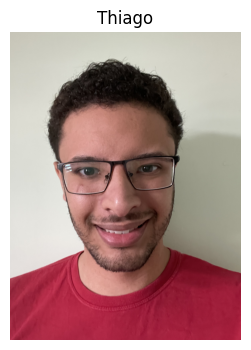

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


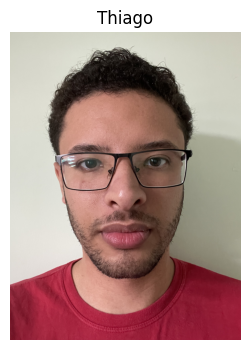

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


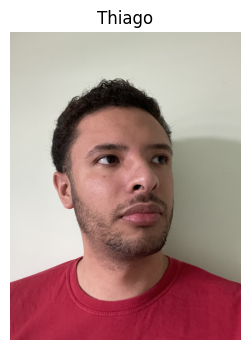

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


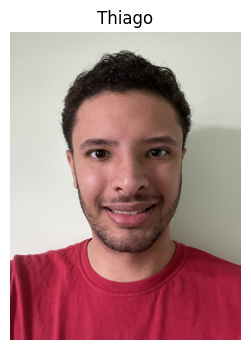

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


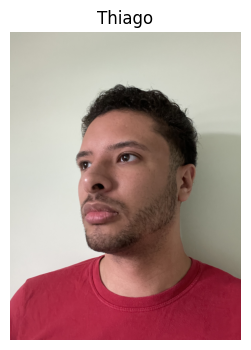

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


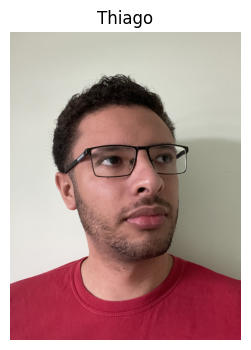

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


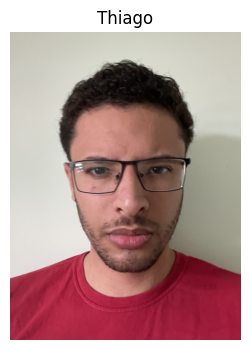

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


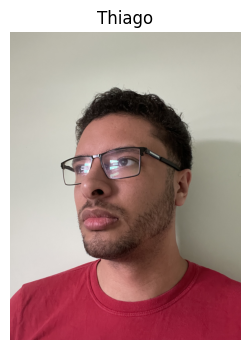

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


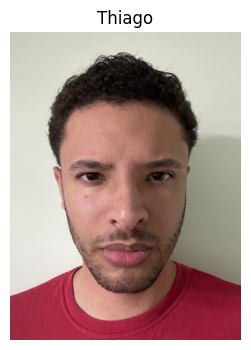

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


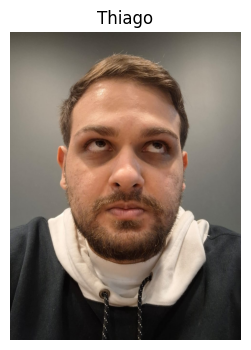

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


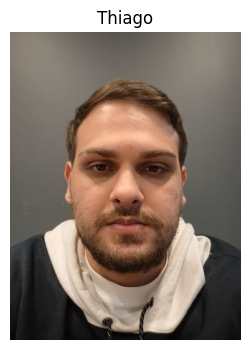

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


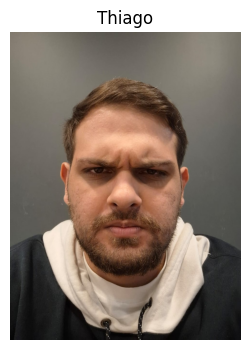

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


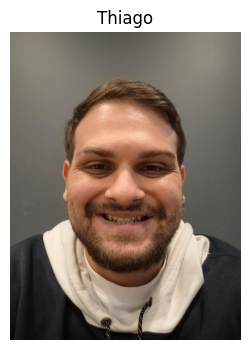

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


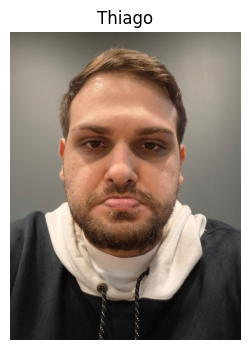

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


KeyboardInterrupt: 

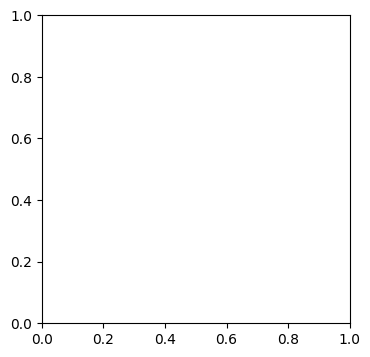

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Caminhos e parâmetros
test_dir = './faces'  # Diretório das imagens de teste
model_path = './face_recognition_model.keras'

# Parâmetros da imagem
img_width, img_height = 150, 150

# Carrega o modelo treinado
model = load_model(model_path)

# Recria o LabelEncoder usado no treinamento
label_encoder = LabelEncoder()
label_encoder.fit([d for d in os.listdir('./faces_detectadas') if os.path.isdir(os.path.join('./faces_detectadas', d))])
num_classes = len(label_encoder.classes_)

# Laço para processar cada subpasta (classe)
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    
    if os.path.isdir(class_path):  # Verifica se é uma pasta
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Caminho completo da imagem
                img_path = os.path.join(class_path, filename)
                
                # Carrega a imagem e redimensiona
                img = cv2.imread(img_path)
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB
                    img_resized = cv2.resize(img_rgb, (img_width, img_height)) / 255.0
                    img_resized = np.expand_dims(img_resized, axis=0)
                    
                    # Realiza a predição
                    prediction = model.predict(img_resized)
                    predicted_class = np.argmax(prediction, axis=1)
                    predicted_label = label_encoder.inverse_transform(predicted_class)[0]

                    # Exibe a imagem com Matplotlib (ajustando o tamanho para exibição)
                    plt.figure(figsize=(4, 4))  # Ajuste o figsize conforme necessário
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converte de volta para RGB para o matplotlib
                    plt.title(predicted_label)
                    plt.axis('off')  # Remove eixos
                    plt.show()

In [ ]:
# # Carrega o modelo treinado
# model = load_model('./face_recognition_model.h5')

# # Dicionário de classes
# class_dict = {v: k for k, v in train_generator.class_indices.items()}
# df = cv2.CascadeClassifier('classifier.xml')

# input_dir = './faces/elvis'

# # Processa cada imagem na pasta 'faces'
# for filename in os.listdir(input_dir):
#     if filename.endswith('.jpg'):
#         file_path = os.path.join(input_dir, filename)
#         i = cv2.imread(file_path)
#         iPB = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

#         # Executa a detecção de faces
#         faces = df.detectMultiScale(iPB, scaleFactor=1.05, minNeighbors=7, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)

#         # Salva cada face detectada na nova pasta com rótulo
#         for j, (x, y, w, h) in enumerate(faces):
#             face = i[y:y+h, x:x+w]
#             face_resized = cv2.resize(face, (img_width, img_height))
#             face_normalized = face_resized / 255.0
#             face_reshaped = np.reshape(face_normalized, (1, img_width, img_height, 3))
#             prediction = model.predict(face_reshaped)
#             label = class_dict[np.argmax(prediction)]
#             face_filename = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}_{label}_{j}.jpg')
#             cv2.imwrite(face_filename, face)
#             cv2.rectangle(i, (x, y), (x + w, y + h), (0, 255, 255), 7)
#             cv2.putText(i, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

#         # Exibe a imagem com as faces detectadas e rotuladas
#         cv2.imshow(f'{filename} - {len(faces)} face(s) encontrada(s)', i)
#         cv2.waitKey(9900)
#         cv2.destroyAllWindows()
